# Data Preprocessing

### Importing relevant libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset and viewing it

In [2]:
#importing the dataset using pandas
dataset = pd.read_csv('data/credit_card_fraud.csv')
dataset.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


### Viewing all the column names and its datatypes


In [3]:
dataset.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [4]:
# Generate descriptive statistics of the data distribtion
dataset.describe()  

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


### Generate descriptive statistics

In [5]:
#Observing the datatypes of each column
dataset.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

# Checking for missing values

In [6]:
#Checking for missing values
dataset.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no missing values to be found in the dataset.

### Checking for duplicates

In [7]:
#Number of duplicated samples
dataset.duplicated().sum()

0

There are no duplicate values to be found in the dataset

## Exploring data, visualising it and understanding it

In [8]:
#Checking for the number of values under each class
dataset.is_fraud.value_counts()

is_fraud
0    337825
1      1782
Name: count, dtype: int64

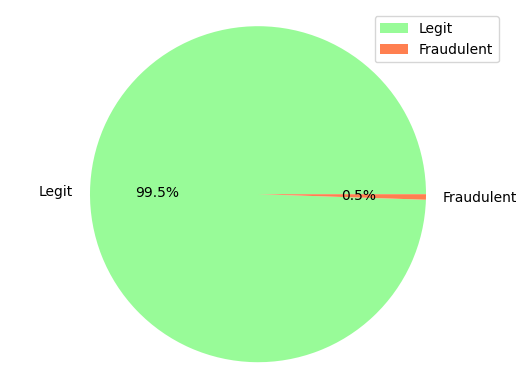

In [9]:
#Plotting the data distribution of the target variable

plt.pie(dataset.is_fraud.value_counts(), labels = ['Legit', 'Fraudulent'], colors = ['palegreen', 'coral'], autopct = '%.1f%%')
plt.legend()
plt.axis('equal')
plt.show()

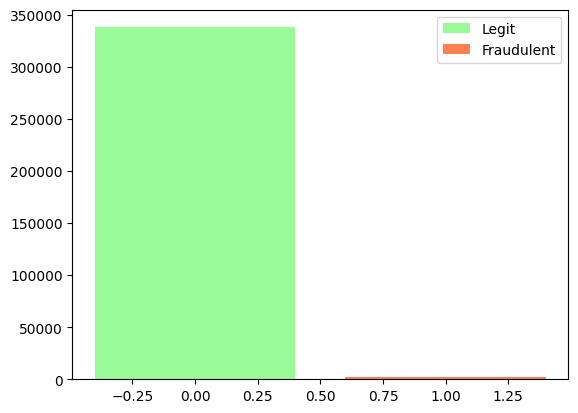

In [10]:
#Plotting the bar plot for is_fraud distribution of classes

legit = dataset[dataset['is_fraud'] == 0]
fraudulent = dataset[dataset['is_fraud'] == 1]

plt.bar(0, len(legit), color='palegreen', label='Legit')
plt.bar(1, len(fraudulent), color='coral', label='Fraudulent')

plt.legend(loc='upper right')
plt.show()

Based on the visualization, it is evident that our dataset exhibits a significant class imbalance between fraudulent and non-fraudulent transactions. This imbalance could potentially bias any predictive model trained on this data towards predicting the majority class, thereby undermining its ability to accurately identify fraudulent transactions.

However, it is important to note that we should not rush into training our model with this dataset as it currently stands. Instead, we need to explore and implement strategies to address this class imbalance, thereby ensuring that our model is not unduly influenced by the disproportionate representation of classes.

#### Checking the correlation with the target variable for numercial features

In [11]:
# Checking the correlation with the target variable for numercial features

numerical_cols = dataset.select_dtypes(include=['float64', 'int64'])

corr = numerical_cols.corrwith(dataset.is_fraud)[:-1]
corr

amt           0.201023
lat           0.009239
long         -0.004494
city_pop      0.002338
merch_lat     0.008848
merch_long   -0.004550
dtype: float64

From our analysis, it is evident that the ‘amt’ feature exhibits a significant correlation with the target variable ‘is_fraud’. This suggests that ‘amt’ could potentially be a strong predictor in our model.

Conversely, the numerical location features and the ‘city_pop’ feature demonstrate a weak correlation with ‘is_fraud’. This implies that they may not serve as strong predictors for our model.

In [12]:
selected_numerical_features = ['amt']

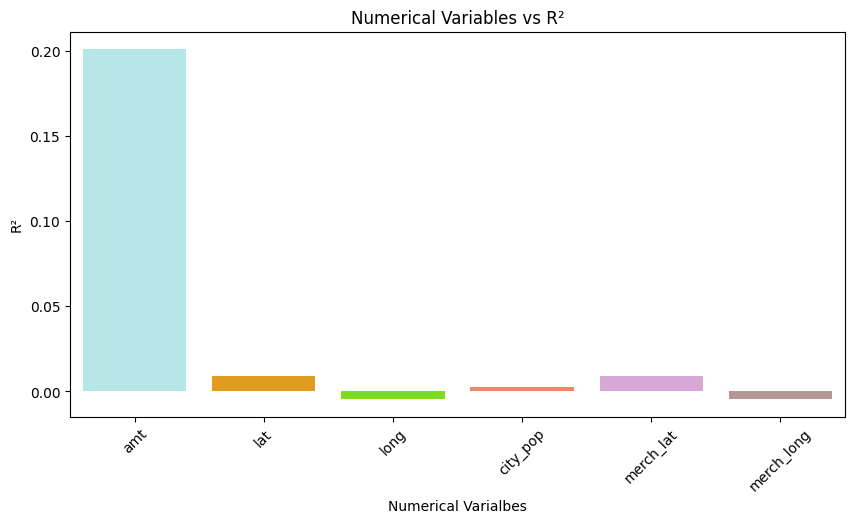

In [13]:
#Plotting bar plot to visualize Numerical Variables vs R\u00b2

plt.figure(figsize=(10, 5))

sns.barplot(x = corr.index, y = corr.values, palette=['paleturquoise', 'orange', 'lawngreen', 'coral', 'plum', 'rosybrown'])
plt.title('Numerical Variables vs R\u00b2')
plt.xticks(rotation=45)
plt.xlabel('Numerical Varialbes')
plt.ylabel('R\u00b2')
plt.show()

## Analysing Categorical Variables

In [14]:
#Selecting only the categorical variables
cat_variables_df = dataset.select_dtypes('object')
cat_variables_description = cat_variables_df.describe()
cat_variables_description

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num
count,339607,339607,339607,339607,339607,339607,339607,339607
unique,338504,693,14,176,13,163,187,339607
top,2019-12-09 17:30:34,Kilback LLC,gas_transport,Phoenix,CA,"Surveyor, minerals",1987-04-23,1f76529f8574734946361c461b024d99
freq,3,1149,35089,7297,80495,6589,4386,1


In [15]:
#To observe the number of unique categories in each of the categorical columns
cat_variables_description.iloc[1, :]

trans_date_trans_time    338504
merchant                    693
category                     14
city                        176
state                        13
job                         163
dob                         187
trans_num                339607
Name: unique, dtype: object

### Unique values in each category

In [16]:
#To observe the number of unique categories in each of the categorical columns
cat_variables_description.iloc[1, :]

trans_date_trans_time    338504
merchant                    693
category                     14
city                        176
state                        13
job                         163
dob                         187
trans_num                339607
Name: unique, dtype: object

#### Performing Chi-Square Test of Independence for Categorical Features


In [17]:
from scipy.stats import chi2_contingency

#Selecting the categorical features
categorical_cols = dataset.select_dtypes(include = ['object'])

chi_results = {}

for cat_col in categorical_cols:
    contingency_table = pd.crosstab(dataset[cat_col], dataset['is_fraud']) 
    # pd.crosstab(dataset[cat_col], dataset['is_fraud']) 
    # This will give a cross table with fraud values as 0 and 1 as cols and like each transaction columns
    # values as row for example
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_results[cat_col] = {'Chi-Square' : chi2, 'p-value': p}

In [18]:
chi_results_df = pd.DataFrame(chi_results).T

#Ordering the rows of dataframe based on p-value.
chi_results_df = chi_results_df.sort_values(by = ['p-value'], ascending = True)
chi_results_df

,Chi-Square,p-value
city,31570.202091,0.000000e+00
job,29197.252678,0.000000e+00
dob,37423.425681,0.000000e+00
category,1417.008486,3.323232e-295
merchant,2144.122007,4.166961e-148
state,130.571299,4.739550e-22
trans_date_trans_time,338808.743360,3.548401e-01
trans_num,339607.000000,4.991932e-01


In [19]:
#To get a summary of the categorical features to select and neglect

selected_cat_features = []
unselected_cat_features = []

for feature, result in chi_results.items():
    # here feature is the key, result is the value of the dictionary
    selected_cat_features.append(feature) if result['p-value'] < 0.05 else unselected_cat_features.append(feature)

for feature in selected_cat_features:
    print(f"The feature '{feature}' is statistically significant and will be kept.")

for feature in unselected_cat_features:
    print(f"The feature '{feature}' is not statistically significant and can be rejected.")

The feature 'merchant' is statistically significant and will be kept.
The feature 'category' is statistically significant and will be kept.
The feature 'city' is statistically significant and will be kept.
The feature 'state' is statistically significant and will be kept.
The feature 'job' is statistically significant and will be kept.
The feature 'dob' is statistically significant and will be kept.
The feature 'trans_date_trans_time' is not statistically significant and can be rejected.
The feature 'trans_num' is not statistically significant and can be rejected.


The features ‘Category’, ‘Merchant’, ‘State’, ‘DOB’, ‘Job’, and ‘City’ have low p-values, which suggests that they are statistically significant and likely have a meaningful impact on the target variable. These features are potentially important predictors in the model.

On the other hand, the features ‘trans_date_trans_time’ and ‘trans_num’ have high p-values. This indicates that there is a greater chance that the observed correlation in the data occurred by chance, and these features may not be significant predictors for the target variable.

In this analysis, a p-value threshold of 0.05 is used. Features with a p-value less than or equal to 0.05 are considered statistically significant and are retained for further analysis. Features with a p-value greater than 0.05 are not considered statistically significant and are not included in the model.

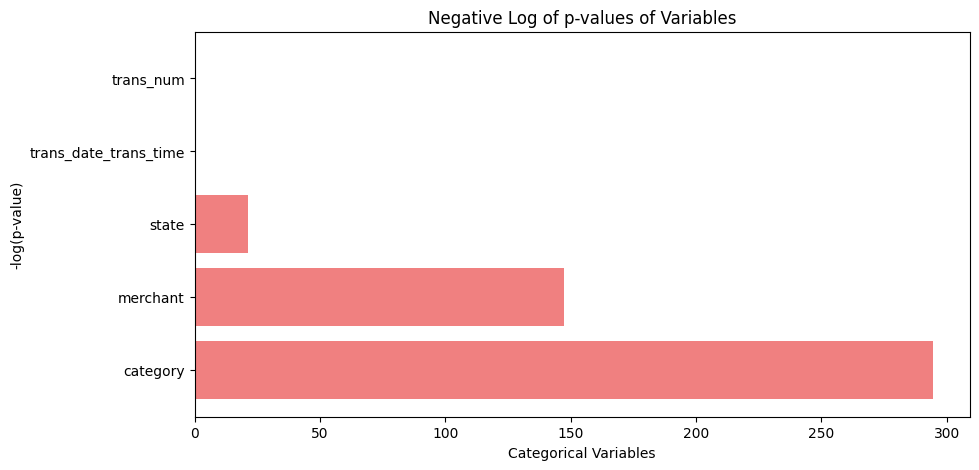

In [20]:
# Calculate -log(p-values) with a small constant added to avoid return inf for -log(0)
minus_log_pvalues = -np.log10(chi_results_df['p-value'] + 1e-350)

# Bar plot of -log(p-values)
plt.figure(figsize=(10, 5))
plt.barh(chi_results_df.index, minus_log_pvalues, color = 'lightcoral')
plt.ylabel('-log(p-value)')
plt.xlabel('Categorical Variables')
plt.title('Negative Log of p-values of Variables')
plt.show()


# Bar plot of Chi-square values


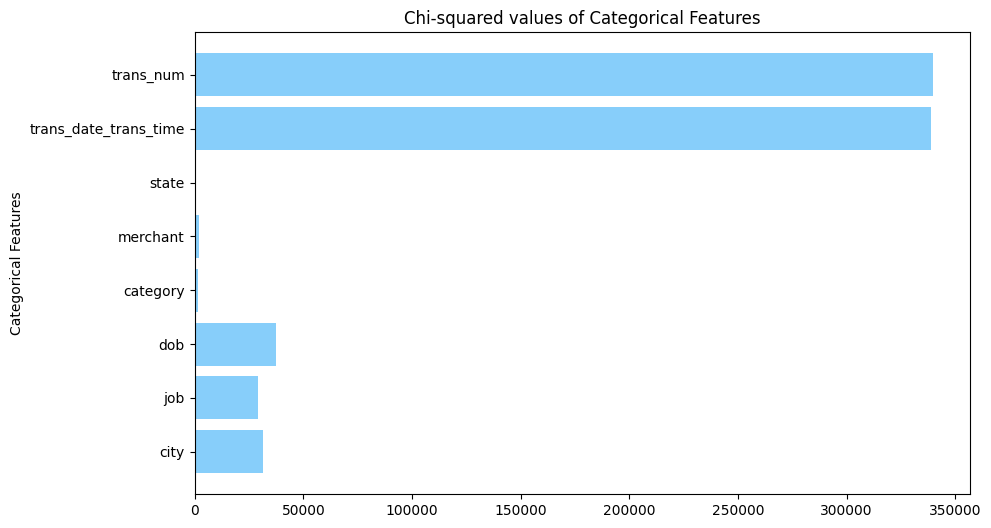

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(chi_results_df.index, chi_results_df['Chi-Square'], color = 'lightskyblue')
plt.ylabel('Categorical Features')
plt.title('Chi-squared values of Categorical Features')

plt.show()

# Data Cleaning

### Filtering out unnecessary features based on above observations


In [22]:
#Selected relevant features we choose to keep in our dataset
relevant_features = ['merchant', 'category', 'amt', 'state', 'city', 'job', 'dob', 'is_fraud'] 

filtered_dataset = dataset[relevant_features]
filtered_dataset.head(n=2)

,merchant,category,amt,state,city,job,dob,is_fraud
0,"Heller, Gutmann and Zieme",grocery_pos,107.23,WA,Orient,Special educational needs teacher,1978-06-21,0
1,Lind-Buckridge,entertainment,220.11,ID,Malad City,Nature conservation officer,1962-01-19,0


In [23]:
filtered_dataset.shape

(339607, 8)

### Checking for duplicate and missing values

In [24]:
#Checking for duplicated samples

filtered_dataset.duplicated().sum()

165

After filtering out the irrelevant features our dataset reflects 165 duplicated samples

In [25]:
#The duplicated records have been removed

filtered_dataset.drop_duplicates(inplace = True)

In [26]:
#checking for missing values

filtered_dataset.isna().sum()

merchant    0
category    0
amt         0
state       0
city        0
job         0
dob         0
is_fraud    0
dtype: int64

### seeing the summary of the filtered dataset

Dataset is free from missing values

In [27]:
# to get a descriptive statistics of the filtered numerical cols

print(filtered_dataset.describe())

                 amt       is_fraud
count  339442.000000  339442.000000
mean       70.598118       0.005250
std       161.709672       0.072265
min         1.000000       0.000000
25%         9.610000       0.000000
50%        46.480000       0.000000
75%        83.360000       0.000000
max     28948.900000       1.000000


In [28]:
# to get a descriptive statistics of the filtered categorical cols

print(filtered_dataset.select_dtypes('object').describe())

           merchant       category   state     city                 job  \
count        339442         339442  339442   339442              339442   
unique          693             14      13      176                 163   
top     Kilback LLC  gas_transport      CA  Phoenix  Surveyor, minerals   
freq           1148          35072   80465     7293                6583   

               dob  
count       339442  
unique         187  
top     1987-10-28  
freq          4380  


# Feature Engineering

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. 


## Changing Column Names

This is more of a data cleaning step than feature engineering, but it’s still important. Having clear and descriptive column names can make the dataset easier to understand and work with. For example, changing the column name of 'amt' to 'amount'.

## Encoding Categorical Variables

Many machine learning models require numerical input and cannot work with categorical data directly. Encoding categorical variables is a way to transform categorical data into a format that can be used by these models.

## Scaling Continuous Variables

Scaling is a technique used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Scaling ensures that all data in a dataset falls in the same range, thus preventing any one variable from dominating others due to its scale. 

### Changing Column Names

Here we are changing the column name amt -> amount for clarity

In [29]:
#To rename amt -> amount

filtered_dataset.rename(columns= {'amt': 'amount'}, inplace = True)

### Encoding Categorical Variables

#### 1. Converting DOB to Age

We plan on converting the 'dob' column values to age using the find and replace method. Currently, the 'dob' column is treated as a categorical variable, containing approximately 187 unique values. Encoding such a variable could lead to a high-dimensional dataset, which might complicate the modeling process. 

Instead, a more efficient approach is to convert 'dob' into a numerical variable by transforming these dates of birth into ages. This not only reduces the complexity of the data cleaning process but also may improve the performance of our machine learning model by providing a more meaningful representation of the data.


In [30]:
from datetime import datetime

# Convert 'dob' to datetime
filtered_dataset['dob'] = pd.to_datetime(filtered_dataset['dob'])

# Calculate 'age' from 'dob'
current_year = datetime.now().year
filtered_dataset['age'] = current_year - filtered_dataset['dob'].dt.year

In [31]:
#Removing the dob column after converting it to age
filtered_dataset.drop(['dob'], axis=1, inplace=True)

#### 2. Binary Encoding

We decided to use binary encoding to encode the categorical features: merchant, category, state, city, and job. 

We considered different encoding mechanisms such as label encoding and one-hot encoding. However, we decided to go with binary encoding due to the following reasons:

- Our categorical variables have many unique values. For example, 'merchant' has 693 unique values, 'category' has 14, 'state' has 13, 'city' has 176, and 'job' has 163. Therefore, using one-hot encoding would massively increase the number of columns and could significantly affect the performance of the model.

- We chose not to go with label encoding. While label encoding is straightforward, it has the disadvantage that the numeric values can be "misinterpreted" by the algorithms. It is not always suitable to directly represent each category with numerical values as it might give the model a wrong impression.

As a solution, we decided to go with binary encoding. Binary encoding is a combination of both label encoding and one-hot encoding. It maintains the dimensionality and reduces the number of columns to 37, thereby reducing the ordinal relationship in the column as well.


In [32]:
import category_encoders as ce

# Get a list of relevant cols to be encoded.
cat_cols = list(filtered_dataset.select_dtypes('object').columns)


# The BinaryEncoder will encode the categorical variables into binary vectors. 
# The cols parameter specifies which columns in the DataFrame should be encoded
encoder = ce.BinaryEncoder(cols= cat_cols)

# The fit_transform method first fits the encoder to the data and then transforms the data into binary vectors
data = encoder.fit_transform(filtered_dataset)

In [33]:
data.dtypes

merchant_0      int64
merchant_1      int64
merchant_2      int64
merchant_3      int64
merchant_4      int64
merchant_5      int64
merchant_6      int64
merchant_7      int64
merchant_8      int64
merchant_9      int64
category_0      int64
category_1      int64
category_2      int64
category_3      int64
amount        float64
state_0         int64
state_1         int64
state_2         int64
state_3         int64
city_0          int64
city_1          int64
city_2          int64
city_3          int64
city_4          int64
city_5          int64
city_6          int64
city_7          int64
job_0           int64
job_1           int64
job_2           int64
job_3           int64
job_4           int64
job_5           int64
job_6           int64
job_7           int64
is_fraud        int64
age             int32
dtype: object

In [34]:
data.head()

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,is_fraud,age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,46
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,62
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,79
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,57
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,57


### Scaling Numerical Variables

In this section, we handle feature normalization to scale the numerical columns ‘amount’ and ‘age’. These two features have very different scales, which can potentially impact the performance of some machine learning algorithms.

The dataset we’re working with doesn’t follow a bell curve (or Gaussian distribution), which is why we’re choosing to use Min-Max scaling for these numerical features. Min-Max scaling is a technique that transforms the features to fall within a specified range, typically between 0 and 1. This ensures that all features contribute approximately proportionately to the final prediction.

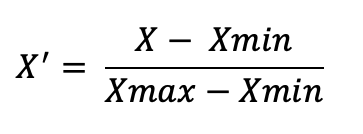

However, Min-Max scaling is sensitive to outliers, which are uncommon values that occur in a dataset. Outliers can skew the distribution of the data and potentially affect the performance of a machine learning model. Therefore, before we apply Min-Max scaling, we’ll first remove the outliers from the dataset.


In [35]:
# Calculate the 25th, 50th, and 75th percentiles of the 'amount' column
quantiles_amount = data.amount.quantile([.25, .5, .75])

# Store the 25th percentile in Q1_amount
Q1_amount = quantiles_amount[.25]

# Store the 75th percentile in Q3_amount
Q3_amount = quantiles_amount[.75]

# Calculate the Interquartile Range (IQR) for 'amount'
IQR_amount = Q3_amount - Q1_amount

# Calculate the lower bound for detecting outliers in 'amount' as 1.5*IQR below Q1_amount
lower_range_amount = Q1_amount - (1.5 * IQR_amount)

# Calculate the upper bound for detecting outliers in 'amount' as 1.5*IQR above Q3_amount
upper_range_amount = Q3_amount + (1.5 * IQR_amount)

# Calculate the 25th, 50th, and 75th percentiles of the 'age' column
quantiles_age = data.age.quantile([.25, .5, .75])

# Store the 25th percentile in Q1_age
Q1_age = quantiles_age[.25]

# Store the 75th percentile in Q3_age
Q3_age = quantiles_age[.75]

# Calculate the Interquartile Range (IQR) for 'age'
IQR_age = Q3_age - Q1_age

# Calculate the lower bound for detecting outliers in 'age' as 1.5*IQR below Q1_age
lower_range_age = Q1_age - (1.5 * IQR_age)

# Calculate the upper bound for detecting outliers in 'age' as 1.5*IQR above Q3_age
upper_range_age = Q3_age + (1.5 * IQR_age)

# Filter the data to include only rows where 'amount' and 'age' are within the lower and upper bounds
dataset_without_outliers = data[(data.amount >= lower_range_amount) & (data.amount <= upper_range_amount) & (data.age >= lower_range_age) & (data.age <= upper_range_age)]

# Reset the index of the DataFrame and drop the old index column
dataset_without_outliers.reset_index(inplace = True)
dataset_without_outliers.drop('index', axis=1, inplace=True)


In [36]:
# Replace the original 'data' DataFrame with the 'dataset_without_outliers' DataFrame
# This means that all future operations that use the 'data' DataFrame will be using the data without outliers

data = dataset_without_outliers

Here we choose to go with min-max algorithm as our dataset doenst really follow a normal distribution and also we have removed the outliers in the dataset since it is slightly bit 

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to scale
columns_to_scale = ['amount', 'age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns from the DataFrame and transform the data
scaled_data = scaler.fit_transform(data[columns_to_scale])

# Replace the original columns with the scaled ones
data[columns_to_scale] = scaled_data

In [38]:
data.head(5)

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,is_fraud,age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.310811
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0.756757
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.459459
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0.459459
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0.472973


## Handling Class Imbalance

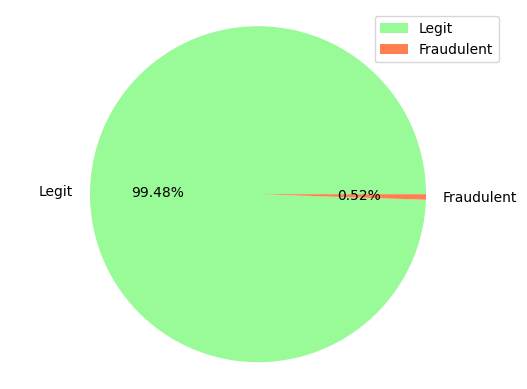

In [39]:
plt.pie(filtered_dataset.is_fraud.value_counts(), autopct = '%.2f%%', labels = ['Legit', 'Fraudulent'], colors = ['palegreen', 'coral'])
plt.legend()
plt.axis('equal')
plt.show()

In [40]:
data.is_fraud.value_counts()

is_fraud
0    320958
1       444
Name: count, dtype: int64

The target variable, 'is_fraud', is a binary variable. However, we observe a significant class imbalance in the dataset. Approximately 99.48% of the 339442 records are legitimate transactions, compared to only 0.52% that are fraudulent transactions.

Class imbalance can bias the predictive model towards the majority class, reducing the model's ability to identify the minority class. To counter this, we can use different data balancing techniques. The techniques considered for this project include:

1. **Undersampling the majority class**: This involves reducing the number of instances from the majority class to match the minority class. However, undersampling can lead to loss of information.

2. **Oversampling the minority class by duplication**: This involves duplicating instances from the minority class to match the majority class. However, oversampling by duplication can lead to overfitting due to exact replication of instances.

3. **Oversampling the minority class using Synthetic Minority Over-sampling Technique (SMOTE)**: SMOTE works by generating synthetic examples from the minority class. It helps to overcome the overfitting problem posed by random oversampling.

Given that the majority class has 337660 instances and the minority class has only 1782, undersampling the majority class would lead to a significant reduction in our dataset. On the other hand, oversampling the minority class by duplication would require replicating the minority class approximately 189 times, leading to excessive duplication.

Therefore, we prefer to use SMOTE, which provides a balance between preserving the majority class data and augmenting the minority class without excessive duplication.

### Oversampling the minority class using Synthetic Minority Over-sampling Technique (SMOTE)

An oversampling method, SMOTE creates new, synthetic observations from present samples of the minority class. Not only does it duplicate the existing data, it also creates new data that contains values that are close to the minority class with the help of data augmentation. These new synthetic training records are made randomly by selecting one or more K-nearest neighbors for each of the minority classes. After completing oversampling, the problem of an imbalanced dataset is resolved and we are ready to test different classification models

In [41]:
X = data.drop('is_fraud', axis=1)  # Selecting the features only without the target variable
y = data['is_fraud']  # Selecting the target variable

In [42]:
X.head()

,merchant_0,merchant_1,merchant_2,merchant_3,merchant_4,merchant_5,merchant_6,merchant_7,merchant_8,merchant_9,...,city_7,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,age
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0.310811
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,1,0.756757
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.459459
3,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0.459459
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0.472973


In [43]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(sampling_strategy=0.5, random_state= 100, k_neighbors= 5)
X_smote, y_smote = smote.fit_resample(X, y) 

In [44]:
y_smote.value_counts()

is_fraud
0    320958
1    160479
Name: count, dtype: int64

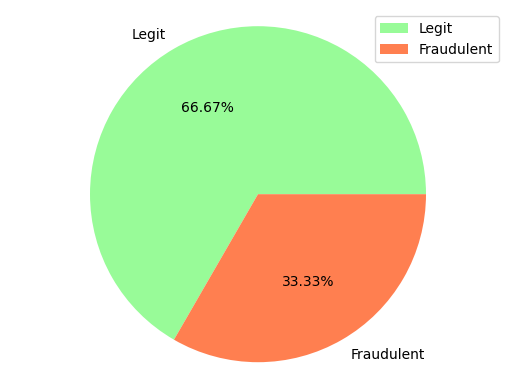

In [45]:
# Count the number of samples in each class after oversampling the minority class using SMOTE
unique, counts = np.unique(y_smote, return_counts=True)

# Plotting the class distribution after smote using a pie chart
plt.pie(y_smote.value_counts(), labels = ['Legit', 'Fraudulent'], colors = ['palegreen', 'coral'], autopct = '%.2f%%')
plt.legend()
plt.axis('equal')
plt.show()

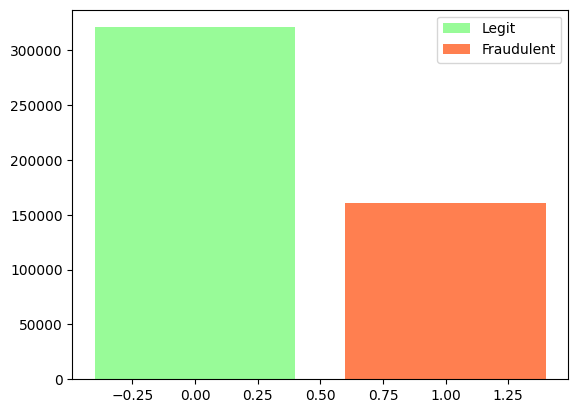

In [46]:
# Plotting the class distribution after smote using a bar chart

legit = y_smote[y_smote == 0]
fraudulent = y_smote[y_smote == 1]

plt.bar(0, len(legit), color='palegreen', label='Legit')
plt.bar(1, len(fraudulent), color='coral', label='Fraudulent')

plt.legend(loc='upper right')
plt.show()

In [47]:
# X_smote is a DataFrame and y_smote is label
# Combine them into a single DataFrame
df_smote = pd.concat([X_smote, y_smote], axis=1)

# Save the DataFrame to an CSV file
df_smote.to_csv('data/credit_card_fraud_dataset_after_smote.csv', index=False)